# Analisis de visitas - modelos de gestión

In [132]:
import pandas as pd
import numpy as np
import matplotlib as plt


def cargarMenu():
        opcion = int(input("""Ingrese la opcion a analizar:
        4-.Acompañamientos
        35.-Visita  a cliente
        0 - Salir\n """))
        
        if opcion != 0:
            mes = input("Ingrese el mes a analizar")
            regla = input("Ingrese la regla de negocio")
            return opcion,mes, regla
        
        return opcion,"",""

def subMenu():
    print("Seleccione la opcion a analizar")
    return input("""1.- Obtener las rutas/clientes que se visitaron menos que la regla de negocio
2.- Obtener las rutas que se visitaron MAS O IGUAL que la regla de negocio
3.- Obtener los MM que cumplen con la regla de negocio\n""")


In [133]:
def cargarArchivo(opcion, mes):
        return pd.read_csv("C:\\Users\\juayala\\Documents\\CursoPython\\schedules" + str(opcion) + mes + ".csv")

Ingrese la opcion a analizar:
        4-.Acompañamientos
        35.-Visita  a cliente
        0 - Salir
 4
Ingrese el mes a analizarAgosto
Ingrese la regla de negocio9
Seleccione la opcion a analizar
1.- Obtener las rutas/clientes que se visitaron menos que la regla de negocio
2.- Obtener las rutas que se visitaron MAS O IGUAL que la regla de negocio
3.- Obtener los MM que cumplen con la regla de negocio
2
Ingrese la opcion a analizar:
        4-.Acompañamientos
        35.-Visita  a cliente
        0 - Salir
 0


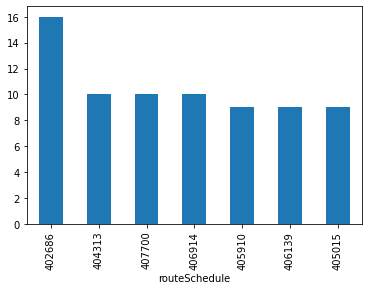

In [142]:
#datos = cargarArchivo(35,"Agosto")
Salir=""

while(Salir!=0):

    optionSelected,mesSelected,regla = cargarMenu()
    
    if optionSelected == 0:
        Salir=0
        break
    
    datos = cargarArchivo(optionSelected, mesSelected)
    tipoAnalisis=0
    
    if optionSelected == 4:

        #Analisis de visita por ruta
        tipoAnalisis = subMenu()
        if tipoAnalisis !=3:
            agrupados = datos.groupby(['routeSchedule'],as_index=False).idSchedul.count().sort_values(by='idSchedul',ascending=False)
        else:
            agrupados = datos.groupby(['employee'],as_index=False).idSchedul.count().sort_values(by='idSchedul',ascending=False)

        analizar(tipoAnalisis, agrupados, regla)


    elif optionSelected == 35:

        #Analisis de visita por cliente
        tipoAnalisis = subMenu()

        if tipoAnalisis !=3:
            agrupados = datos.groupby(['customer'],as_index=False).idSchedul.count().sort_values(by='idSchedul',ascending=False) 
        else:
            agrupados = datos.groupby(['employee'],as_index=False).idSchedul.count().sort_values(by='idSchedul',ascending=False)

        analizar(int(tipoAnalisis), agrupados, regla)
      
    else:
        print("Opcion incorrecta, por favor verifique!")
    


In [134]:

def analizar(tipo, data, regla):
    
#agrupados = datos.groupby(['customer'],as_index=False).idSchedul.count().sort_values(by='idSchedul',ascending=False).head(10)
        
    #Menos visitas
    if int(tipo) == 1:
        data = data[data["idSchedul"] < int(regla) ]
        
    #Mayor o igual a las visitas
    elif int(tipo) == 2:
        data = data[data["idSchedul"] >= int(regla) ]
        
    #Mandos medios que si cumplieron con las visitas
    else:
        print(tipo)
        #Pendiente
        
    if data.shape[0] > 0:  #si el dataframe tiene rows 
        #Crear la grafica
        data.set_index('routeSchedule',inplace=True)
        data["idSchedul"].plot(kind='bar')
    else:
        print("No se encontraron datos")
        
        

        
        
        
        

In [140]:
agrupados

,routeSchedule,idSchedul
514,402686,16
668,404313,10
1086,407700,10
995,406914,10
893,405910,9
...,...,...
573,403431,1
570,403332,1
569,403331,1
1271,408487,1
